
## Noether's theorem

If the functional $J = \int^b_a L(t, x^{\mu}, \dot x^{\mu}) dt$ is an extremal, and if under the infinitesimal transformation $t' = t + \epsilon \tau + \dots, q'^{\mu} = q^{\mu} + \epsilon \zeta^{\mu} + \dots $ the functional is invariant according to the definition (allowing of the inhomogenous case) $L'\frac{dt'}{dt}-L = \epsilon\frac{dF}{dt} + \mathcal O(e^s),$ where $s>1$ then the following conservation law holds: $p_{\mu}\zeta^{\mu} - H\tau - F = const$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functionals

Take a function as an argument. (But how are the functions represented?)
In the linear case this makes sense to me. The function can be embedded in some vector space. But what about in the more general case? (Aka black-box integration?)

> _For the functional to be continuous, it is necessary for the vector space V of functions to have an appropriate topology._ (Huh?)



#### Definite integrals


$$
J[f]: f \rightarrow \mathbb R \\
J = \int f(x(t)) dt \\
$$
This reminds me of an inner product? Or some sort of kernel being applied over $t$.

#### Local vs non-local

The calculation of the functional is local!!


#### Differentiation

The first variation is defined as the linear part of the change in the functional, and the second variation is defined as the quadratic part.

Let $X, Y$ be two function spaces endowed with norms and inner products
(technically, Hilbert spaces). A functional $\phi$ is a map from $X$ to $\mathbb R$. We
denote its action on a function $f$ as $\phi(f)$. An operator $F$ is a map from $X$
to $Y$ . We denote its action on a function $f$ as $F f$.
We say that a functional $\phi$ is Frechet differentiable at $f \in X$ when there
exists a linear functional $A : X \rightarrow \mathbb R$ such that

$$
\lim_{h\rightarrow 0} \frac{\parallel \phi(f + h) − \phi(f) − A(h)\parallel_?}{\parallel h \parallel_X} = 0\\
$$


If this relation holds, we say that $A$ is the functional derivative, or Frechet
derivative, of $\psi$ at $f$, and we denote it as

$$
A = \frac{\delta \phi}{\delta f}[f]
$$

* https://en.wikipedia.org/wiki/Functional_derivative
* https://ocw.mit.edu/courses/mathematics/18-325-topics-in-applied-mathematics-waves-and-imaging-fall-2012/lecture-notes/MIT18_325F12_Appendix_A.pdf

***

What are we really doing here?

Fitting a linear function to how a functional changes about its arguments. (that's classic differentiation -- take a linear approx evaluated at some input). But, the part that isnt making sense to me is the direction $h$.



In [23]:
# rearrange to (by setting h to be small) <-- ??;
# functional(f+h) - functional(f) = A.h
# does that work?

# this is where we are going to evaluate the functional
f = lambda x: x**2

# wtf is h? how do we actually compute this?
h = lambda x: np.ones_like(x)*1e-10 # ???

# now define the functional
N = 1000
X = np.linspace(0, 1, N)
phi = lambda f: np.sum([f(x) for x in X])

def add(f, g):
    return lambda x: f(x) + g(x)

def frechet_derivative(functional, f, h):
    """
    Args:
        functional (func): functional: func -> scalar
        f (func): The function to evaluate the derivative at. np.ndarray -> np.ndarray (or scalar?)
        h (func): The pertubation to the argument of the functional. np.ndarray -> np.ndarray (or scalar?)
        
    Returns:
        (func): (this should return a func or the value of the gradient at f?)
    """
    difference = functional(add(f, h)) - functional(f)
    # Ax = b
    x, residuals, rank, s = np.linalg.lstsq(h(X), np.array(difference).reshape(1))
    # this solution is under constrained? doesnt seem right.
    # what does A.h mean? Evaluate A.h(x) at some x? It must?! But how do we solve that?
    return x


frechet_derivative(phi, f, h)
# how can we visualise this?
# what about second order?

array([ 1000.00022485])

#### Why bother with functionals?

* What does the functional prespective actually buy us? Not sure...
* Why do we need it for working with Lagrangians?
* 

Want to find the optimal function, $x(t)$, that minimises $J$. This could be framed in traditional calculus if we parametersed ($x_{\theta}(t)$) and then minimise w.r.t $\theta$ by following $\frac{\partial J}{\partial \theta}$ downhill. We have lost some generality here as we now need to use a specific parameterisation of x(t). But if the parameterisation can approximate the optimal solution within some tolerance then this doesnt matter? ($\epsilon > \parallel x^*(t) - x_{\theta}(t) \parallel $)

When do we not care about $x(t)$? But rather ...?

## Lagrangians

The lagrangian is the integrand of a functional ?!

Ok, so we want to find the function, $x(t)$ that minimises J, but how can we search over $\mathcal X$ in any meaningful way, other than just brute-forcing the search!? How is it done in practice!? (it isnt? they use analytical solutions/approximations).

When minimising a functional it seems necessary that the function(s) have some sort of ordering on them (if they are cts/infinite?), otherwise we need to evaluate every possible one (and there might be an infinite number... -- not possible to calculate).



$$
\int^b_a L(t, x^{\mu}, \dot x^{\mu}) dt \tag{explain} \\
$$

#### Projection onto a line

Some meaningful part of the systems state can be described by a single variable.
Because we are projecting into the reals, we also think the states are _orderable_ according to $L$. (this seems interesting?!? we can order states according to their !?!?, loss, action, ?)
What are we actually measuring!? Some examples/metaphors? The change in action!?
 
_What does using a single variable buy us? What if the lagrangian returned higher dimensional values? We could generalise the sum into a 1-norm and explore other norms? Is there integral notation for other norms?_

#### Sums over real values

So what are we really doing when we take the integral of a lagrangian? The lagrangian returns a scalar value in the reals, and we take the sum over time of the different 

So why not write the lagrangian as $\int^b_a L(t) dt$? And hide the dynamics of the system within $L$?

There are two parts to the lagrangian?? The dynamics of the state variables, the conversion of state into a scalar, real value.

Taking the area under the $L(t)$ curve.

#### Classical mechanics

If L can be defined as $L=T-V$ (kinetic energy - potential energy) then J measures $\int T(t) - V(t) dt$ which is the sum of changes in $T,V$. But, because energy is conserved, $\delta T \sim \delta V$, so ???.
J would be large if all energy is kinetic, and small if all energy is potential.

TODO. Simulate a simple example - ball rolling down hill, electron accelerating in a field?!?


#### Non holonomic constraints

Relationship to lagrangian multipliers and optimisation!?
THe duality between generalised variables and multipliers!?
https://en.wikipedia.org/wiki/Holonomic_constraints

## Finding extrema

Definition of extrema!? Grad = 0.

The extremal solutions of a lagrangian,

#### Euler lagrange

$$
\int^b_a L(t, x^{\mu}, \dot x^{\mu}) dt
$$

are given by the euler-lagrange equation.

$$ 
\frac{\partial L}{\partial x^{\mu}} = \frac{d}{dt}\frac{\partial L}{\partial \dot x^{\mu}}
$$



$$x_{(\epsilon)}^{\mu} = x^{\mu} + \epsilon \eta^{\mu}$$

What we are really saying is let $\hat x_{\mu}$ be the extremal solution, then use $x_{(\epsilon)}^{\mu} = \hat x^{\mu} + \epsilon \eta^{\mu}$


So this allows us to index nearby (according to a linear distance measure) functions, giving them an ordering/locality. We can use this to show that; 

$$
J(\epsilon) = ...
$$
So the functional is now a function of $\epsilon$, so how can it still be a functional?! As $\epsilon$ is a scalar!?


$$
\frac{dJ}{d\epsilon} = \lim_{\epsilon \rightarrow 0} J(\epsilon) - J(0)
$$

any function some distance away from f* 

So although we can pick $\eta(t)$ to be any function, we have to pick one when we differentiate w.r.t $\epsilon$. This means that we cannot index all paths between a,b with some linear combination of $\hat x(t)$ and $\eta(t)$ !!!???.


Easy way to check... Evaluate empirically and check versus the derived equations.

In [4]:
# import autograd.numpy as np
# from autograd import grad

a = 0; b = 1; N = 1000

t = np.linspace(a, b, N)
x = lambda t: t**2
dx = lambda t: 2*t
L = lambda t, x, dx: np.linalg.norm(x) 

J = np.sum(L(t, x(t), dx(t)))

# dLdx = lambda x: 
print(J)

14.152750039


#### Functions that take gradients as arguments

What does a function of $x$ and $\dot x$ look like? The derivative information is already within $x$?! So why do we need to pass $\dot x$ in as an argument as well!?

Let $y = (t, x(t), \dot x(t))$ where $x(t) = t^2$ and thus $\dot x(t) = 2t$. Then $y$ could be some function of $t, x(t), \dot x(t)$...


This reminds me of gradient descent. Where $x$ is the parameters, $t$ counts the number of iterations, and $\dot x(t)$ is the updates. Gradient descent is then; $f(t, x(t), \dot x(t)) = \sum_0^T L(x(t), y), where x(t) = x(t) + \dot x(t)$?!?! Oh... normally we need dL/dx not dx/dt!>

Alternatively, we could think of $t, x(t)$ as the state of the system, and $\dot x(t)$ as its current dynamics!?
For example !?



#### Gradients wrt to gradients

What the hell is $\frac{d y}{d \dot x}$, what does it mean? Need some intuition.

If we let $y = x(t)^2$, where $x(t) = sin(t)$ then $\frac{dy}{d\dot x}$ is ?? What is this really asking? How does $y$ change with changes in the gradient of $x$ wrt time?
$\frac{dx}{dt} = cos(t)$ so then $\frac{d y}{d \dot x} = $
Well, a linear approximation to $y$ would give $y = mx + c$ aka $y = \big[\frac{dy}{dx}\big]_xx + c$

$\frac{dy}{dt} = \frac{dy}{dx}\frac{dx}{dt} = 2xcos(t) = 2sin(t)cost(t)$


Typical approach seems to be to treat the gradient as just another independent (from x) variable. Yea ok, i think I see. X has no effect on the value of mangnitude of the gradient (as they are evaluated at some t) (but dx/dt does effect x!?). 
Treat $y(x) = y(x, v), v = \dot x$ then $y = x^2, \frac{\partial y}{\partial v} = 0$.
But this isnt true? See picture? Maybe that is just correlation though? Not dependence? But it has implicit dependence, because how $x$ changes shapes how $y$ changes!?!

Example. Velocity.


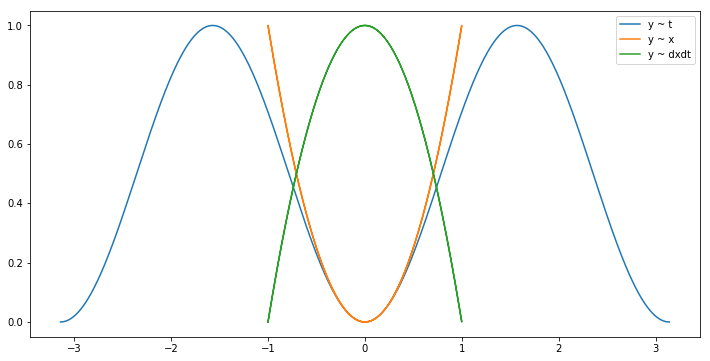

In [32]:
t = np.linspace(-np.pi, np.pi, N)
x = np.sin(t)
y = x**2
dxdt = np.cos(t)

plt.figure(figsize=(12, 6))
plt.plot(t, y, label='y ~ t')
plt.plot(x, y, label='y ~ x')
plt.plot(dxdt, y, label='y ~ dxdt')
plt.legend()



#### A worked example

How does euler-lagrange actually help us find extremal solutions?



## Invariance

How is conservation and invariance different?

Iff there is a symmetry then there is an invariant (?).


#### Infinitesimal transformations

Let T, Q be arbitrary (?) transformations, then we can approximate them with a taylor expansion

$$
t' = t + \epsilon \tau + \dots \\
q'^{\mu} = q^{\mu} + \epsilon \zeta^{\mu} + \dots\\
$$

What is with the expanded definition of invariance? Approximate invariance $\sim$ within some $\epsilon$. I am not quite sure how approximate invariance can lead to conservation, it seems like the small difference in values would slowly leak out and break the conservation? Approximate invariance implies conservation!?!??!


#### Rund-Trautman identity

If the functional $J = \int^b_a L(t, x^{\mu}, \dot x^{\mu}) dt$ is invariant under the infinitesimal transformation $t' = t + \epsilon \tau + \dots, q'^{\mu} = q^{\mu} + \epsilon \zeta^{\mu} + \dots $ then 

$$
\frac{\partial L}{\partial q^{\mu}}\zeta^{\mu} + p_{\mu}\dot\zeta^{\mu} + \frac{\partial L}{\partial t}\tau - H\dot \tau = 0
$$

_Ok. What would it take to generalise this to discrete variables?! To non-cts transformations? _

#### Approximate invariance

## Questions

* __Q__: So wtf is conservation? How is it different to invariance?
* __Q__: When does a symmetry not have a conserved quantity? (by the definition of symmetries -- invariance to a transformation -- you would expect that that, given the 'right' measure of some quantity, it would be conserved?
* __Q__: Wouldnt/shouldnt some of the conserved quantity leak away if it isnt perfectly invariant!?

## Discrete symmetries

Need discrete dynamical systems!?

* https://arxiv.org/abs/1103.4785
* https://arxiv.org/abs/1203.1206
* https://arxiv.org/abs/1106.3597
* https://arxiv.org/abs/1103.3267 

* Discrete conservation https://physics.stackexchange.com/questions/8518/is-there-something-similar-to-noethers-theorem-for-discrete-symmetries

## Resources

* Looking glass universe
* The book [Emmy Noether's wonderful theorem]()